# Voting Algorithm on classification

## The Core-ideas
- All Model are trained independently to different models 
- The majority of models ouput will be result

## Assumption on Voting ensemble
- Base model should be independent
- All models accuracy must be minimum 50%

<img src="https://i.stack.imgur.com/svqUP.jpg">

In [2]:
## Voting classifiers 

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [3]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# remove Id col
df = df.iloc[:,1:]
df.head()

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,setosa
1,3.0,1.4,0.2,setosa
2,3.2,1.3,0.2,setosa
3,3.1,1.5,0.2,setosa
4,3.6,1.4,0.2,setosa


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
encoder = LabelEncoder()

In [7]:
df['species'] = encoder.fit_transform(df['species'])

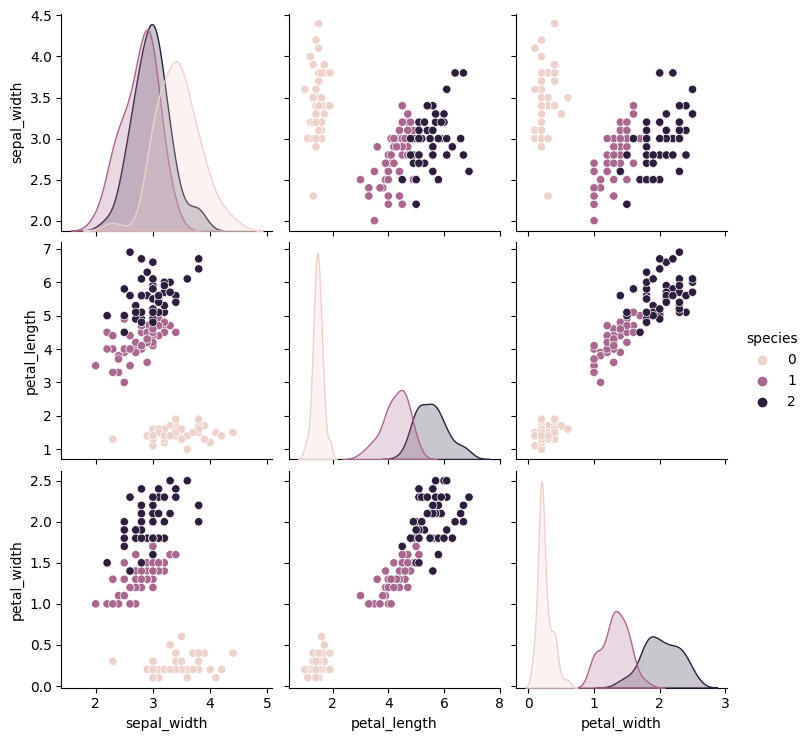

In [8]:
import seaborn as sns
sns.pairplot(df,hue='species')

In [9]:
new_df = df[df['species'] != 0][['sepal_width','sepal_width','species']]

In [10]:
new_df.head()

,sepal_width,sepal_width,species
50,3.2,3.2,1
51,3.2,3.2,1
52,3.1,3.1,1
53,2.3,2.3,1
54,2.8,2.8,1


In [11]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [13]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [14]:
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

In [15]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

lr 0.95
rf 0.94
knn 0.95


In [16]:
from sklearn.ensemble import VotingClassifier

### Hard voting

In [17]:
vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.95


### soft voting

In [18]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.95


### Weighted voting

In [20]:

for i in range(1,4):
    for j in range(1,4):
        for k in range(1,4):
            vc = VotingClassifier(estimators=estimators,voting='soft',weights=[i,j,k])
            x = cross_val_score(vc,X,y,cv=10,scoring='accuracy')
            print("for i={},j={},k={}".format(i,j,k),np.round(np.mean(x),2))

for i=1,j=1,k=1 0.95
for i=1,j=1,k=2 0.95
for i=1,j=1,k=3 0.95
for i=1,j=2,k=1 0.95
for i=1,j=2,k=2 0.95
for i=1,j=2,k=3 0.95
for i=1,j=3,k=1 0.95
for i=1,j=3,k=2 0.95
for i=1,j=3,k=3 0.95
for i=2,j=1,k=1 0.95
for i=2,j=1,k=2 0.95
for i=2,j=1,k=3 0.95
for i=2,j=2,k=1 0.95
for i=2,j=2,k=2 0.95
for i=2,j=2,k=3 0.95
for i=2,j=3,k=1 0.95
for i=2,j=3,k=2 0.95
for i=2,j=3,k=3 0.95
for i=3,j=1,k=1 0.95
for i=3,j=1,k=2 0.95
for i=3,j=1,k=3 0.95
for i=3,j=2,k=1 0.95
for i=3,j=2,k=2 0.95
for i=3,j=2,k=3 0.95
for i=3,j=3,k=1 0.95
for i=3,j=3,k=2 0.95
for i=3,j=3,k=3 0.95


## Classifiers of Same Algo

In [21]:
from sklearn.svm import SVC

In [22]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]

for estimator in estimators:
    x = cross_val_score(estimator[1],X,y,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),2))

svm1 0.85
svm2 0.85
svm3 0.89
svm4 0.81
svm5 0.86


In [23]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.93
